In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


**Loading data in CSV**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [12]:
df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


<Axes: xlabel='relative_velocity', ylabel='miss_distance'>

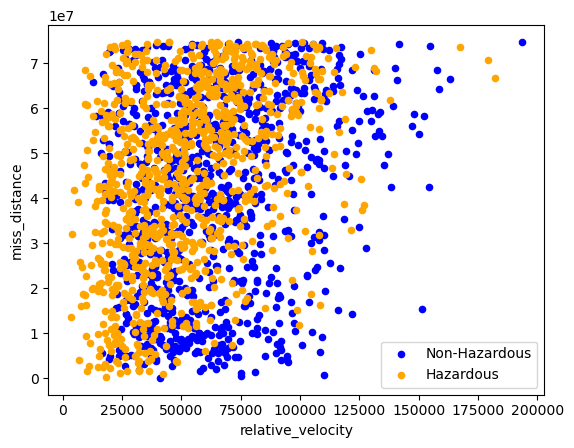

In [13]:
df["hazardous"]=df["hazardous"].astype(int)
df['sentry_object']=df['sentry_object'].astype(int)
#help(df.plot())
#df.plot(kind='scatter', x='absolute_magnitude', y='hazardous')
safe_df=df[df['hazardous']==1][0:1000]
unsafe_df=df[df['hazardous']==0][0:1000]

axes=safe_df.plot(kind='scatter', x='relative_velocity', y='miss_distance', color='blue', label='Non-Hazardous')
unsafe_df.plot(kind='scatter', x='relative_velocity', y='miss_distance', color='orange', label='Hazardous', ax=axes)

**Cleaning of data**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  int64  
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 6.9+ MB


In [15]:
rich_df=df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'sentry_object', 'absolute_magnitude']]

X=np.asarray(rich_df)
y=np.array(df['hazardous'])

In [29]:
from sklearn import svm
from sklearn.metrics import precision_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=20000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
#kernel='linear'
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Kernel:", kernel)
    print("Precision:", precision)
    print("F1-Score:", f1)

Kernel: linear
Precision: 0.9346806207145435
F1-Score: 0.881852230166837
Kernel: poly
Precision: 0.9413892908827786
F1-Score: 0.8869950570990285
Kernel: rbf
Precision: 0.9538799414348462
F1-Score: 0.8932305055698371
Kernel: sigmoid
Precision: 0.8729096989966555
F1-Score: 0.8567208271787297
